<a href="https://colab.research.google.com/github/sundarp17/sundar_info5731_fall2020/blob/master/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [5]:
# Write your code here
import pandas as pd

df=pd.read_csv('/content/title.csv')
df.head()


,Title
0,Data science in action
1,Data science and its relationship to big data ...
2,Data Science for Business: What you need to kn...
3,Data science and prediction
4,"Data science, predictive analytics, and big da..."


In [7]:
import re
#removing punctutations
df['Title']=df['Title'].map(lambda x: re.sub('[,\.!?]', '', x))
#lower
df['Title']=df['Title'].map(lambda x: x.lower())
df.head()

,Title
0,data science in action
1,data science and its relationship to big data ...
2,data science for business: what you need to kn...
3,data science and prediction
4,data science predictive analytics and big data...


In [8]:
#tokens
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df.Title.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['data', 'science', 'in', 'action']]


In [9]:
#Phrase modeling
#Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['datum', 'science', 'action']]


In [12]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [13]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [15]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.076*"datum" + 0.039*"data" + 0.026*"information" + 0.026*"nuclear" + '
  '0.026*"cluster" + 0.026*"stream" + 0.014*"next" + 0.014*"link" + '
  '0.014*"vii" + 0.014*"technology"'),
 (1,
  '0.090*"datum" + 0.064*"science" + 0.046*"big" + 0.037*"data" + '
  '0.028*"system" + 0.019*"processing" + 0.019*"workflow" + 0.019*"run" + '
  '0.019*"application" + 0.019*"method"'),
 (2,
  '0.065*"science" + 0.033*"datum" + 0.033*"new" + 0.022*"model" + '
  '0.022*"knowledge" + 0.022*"data" + 0.022*"quality" + 0.012*"miss" + '
  '0.012*"large" + 0.012*"scientific"'),
 (3,
  '0.082*"datum" + 0.073*"science" + 0.037*"mining" + 0.019*"management" + '
  '0.019*"research" + 0.019*"product" + 0.019*"change" + 0.019*"global" + '
  '0.019*"introduction" + 0.019*"computer"'),
 (4,
  '0.060*"science" + 0.041*"datum" + 0.021*"citizen" + 0.021*"analytic" + '
  '0.021*"method" + 0.021*"big" + 0.021*"hype" + 0.021*"space" + '
  '0.021*"distribution" + 0.021*"experiment"'),
 (5,
  '0.077*"science" + 0.04

In [16]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4491041425839929


In [31]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [33]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()







  0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)





  0%|          | 1/270 [00:00<02:48,  1.60it/s]




  1%|          | 2/270 [00:01<02:45,  1.62it/s]




  1%|          | 3/270 [00:01<02:43,  1.63it/s]




  1%|▏         | 4/270 [00:02<02:41,  1.64it/s]




  2%|▏         | 5/270 [00:03<02:41,  1.64it/s]




  2%|▏         | 6/270 [00:03<02:49,  1.56it/s]




  3%|▎         | 7/270 [00:04<02:53,  1.51it/s]




  3%|▎         | 8/270 [00:05<02:58,  1.46it/s]




  3%|▎         | 9/270 [00:06<03:08,  1.38it/s]




  4%|▎         | 10/270 [00:06<03:08,  1.38it/s]




  4%|▍         | 11/270 [00:07<03:06,  1.39it/s]




  4%|▍         | 12/270 [00:08<03:11,  1.34it/s]




  5%|▍         | 13/270 [00:09<03:16,  1.31it/s]




  5%|▌         | 14/270 [00:09<03:27,  1.23it/s]




  6%|▌         | 15/270 [00:10<03:27,  1.23it/s]




  6%|▌    

In [ ]:
#If we observe, the excel coherence score seems to keep increasing with the number of topics, 
#it may make better sense to pick the model that gave the highest CV before flattening out or a major drop. 
#In this case, I picked K=8

In [34]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [36]:
!pip install pyLDAvis
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

     |████████████████████████████████| 1.6MB 9.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7f5c03f77056fe36990af390491d8140672f3fb7febef54912dcaed2eea151b9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.031425  0.001409       1        1  21.173478
6      0.013429  0.018296       2        1  18.789318
2      0.004828 -0.018531       3        1  16.572551
3     -0.005007  0.011117       4        1  16.183634
0      0.007669 -0.002439       5        1  11.737608
7      0.005670 -0.004134       6        1   7.589166
5      0.002139 -0.002265       7        1   4.764517
4      0.002697 -0.003454       8        1   3.189727, topic_info=            Term      Freq      Total Category  logprob  loglift
86      citation   1.00000   1.000000  Default  30.0000  30.0000
2        science  12.00000  12.000000  Default  29.0000  29.0000
233     computer   1.00000   1.000000  Default  28.0000  28.0000
143        model   2.00000   2.000000  Default  27.0000  27.0000
142  information   1.00000   1.000000  Default  26.0000  26.0000
..           ...       ...        ...      ...      ...      ...
70     reference   0.05355   1.614206   Topic8  -5.6824   0.0393
71     statistic   0.05355   1.614206   Topic8  -5.6824   0.0393
72          data   0.05355   4.095033   Topic8  -5.6824  -0.8917
73     objective   0.05355   1.662951   Topic8  -5.6824   0.0095
74    processing   0.05355   1.958534   Topic8  -5.6824  -0.1541

[376 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
224       2  0.579989         age
89        1  0.495109   algorithm
89        2  0.495109   algorithm
29        1  0.383006    analysis
29        2  0.383006    analysis
...     ...       ...         ...
217       1  0.601341  vegetation
242       2  0.610507   visualize
125       2  0.610507        wise
147       4  0.539973    workflow
63        2  0.610507       yield

[133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 4, 1, 8, 6, 5])

In [ ]:
#As you can see in the above visualization, the right hand part shows the top 30 silent terms. 
#The terms reasearch, data, analysis, global, mining, science, model, new are most frequently occuring words.

In [37]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"science" + 0.020*"datum" + 0.013*"information" + 0.009*"cluster" + '
  '0.009*"nuclear" + 0.009*"data" + 0.009*"citizen" + 0.009*"next" + '
  '0.006*"free" + 0.006*"space"'),
 (1,
  '0.030*"datum" + 0.017*"data" + 0.017*"science" + 0.016*"big" + '
  '0.011*"structure" + 0.011*"analysis" + 0.011*"network" + 0.011*"system" + '
  '0.011*"protein" + 0.011*"method"'),
 (2,
  '0.027*"science" + 0.018*"datum" + 0.015*"new" + 0.012*"model" + '
  '0.009*"knowledge" + 0.009*"scientific" + 0.009*"quality" + '
  '0.006*"theoretical" + 0.006*"compete" + 0.006*"update"'),
 (3,
  '0.042*"datum" + 0.024*"science" + 0.015*"mining" + 0.012*"global" + '
  '0.009*"change" + 0.009*"relationship" + 0.009*"research" + 0.009*"workflow" '
  '+ 0.009*"introduction" + 0.006*"master"'),
 (4,
  '0.011*"science" + 0.011*"citation" + 0.007*"experiment" + 0.007*"impact" + '
  '0.007*"reconnaissance" + 0.007*"hirise" + 0.007*"web" + 0.007*"image" + '
  '0.007*"count" + 0.007*"faculty"'),
 (5,
  '0.015*"

In [ ]:
#summarization of topic 7 and topic 6
#the topic 7 is represented as follows
#'0.014*"science" + 0.010*"datum" + 0.007*"phylogenetic" + 0.007*"political" '
 # '+ 0.007*"supply" + 0.007*"transform" + 0.007*"practice" + 0.007*"discovery" '
  #'+ 0.007*"predictive" + 0.007*"multiple"'

#It means the top 10 keywords that contribute to this topic are:
#"science","datum","phylogentic",...and the weight of 'science'' on topic 7 is 0.014.

#The weights reflect how important a keyword is to that topic.
#may be we can summarize the topic as 'data science in political field'
#topic 6: Analysis of climate data
#topic 5: self practising the algorithms in computer science stream
#topic 4: Visualization science by citation and reconnaissance high resolution imaging experiment
#topic 3: Introduction to global change research in data science and data mining
#topic 1: Structure analysis and network systems in protein data
#topic 2: data science in scientific knowledge



## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [38]:
# Write your code here
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
number_of_topics = 10
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

from gensim.models import LsiModel

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [39]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start, step):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [40]:
dictionary,doc_term_matrix=prepare_corpus(data_lemmatized)
model_list_lsa, coherence_values_lsa = compute_coherence_values(dictionary, doc_term_matrix,data_lemmatized,44,2,6)

In [41]:
coherence_values_lsa

[0.42563702214153015,
 0.42563702214153015,
 0.42563702214153015,
 0.43947489141036045,
 0.38549656717466896,
 0.37222252760573904,
 0.37222252760573904]

In [42]:
for m, cv in zip(x, coherence_values_lsa):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4256
Num Topics = 8  has Coherence Value of 0.4256
Num Topics = 14  has Coherence Value of 0.4256
Num Topics = 20  has Coherence Value of 0.4395
Num Topics = 26  has Coherence Value of 0.3855
Num Topics = 32  has Coherence Value of 0.3722
Num Topics = 38  has Coherence Value of 0.3722


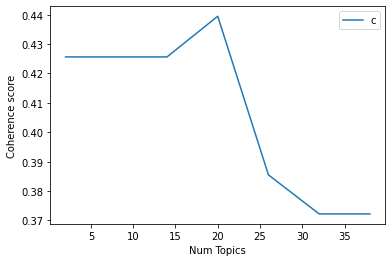

In [44]:
limit=44; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values_lsa)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
#as you can see, when number of topics is 20, coherence is at peak.
optimal_model_lsa = model_list_lsa[5]
model_topics_lsa = optimal_model_lsa.show_topics(formatted=False)
pprint(optimal_model_lsa.print_topics(num_words=10))

[(0,
  '0.755*"datum" + 0.561*"science" + 0.106*"mining" + 0.096*"big" + '
  '0.082*"analytic" + 0.063*"knowledge" + 0.055*"relationship" + 0.054*"data" '
  '+ 0.053*"management" + 0.050*"business"'),
 (1,
  '0.745*"science" + -0.538*"datum" + -0.128*"big" + 0.085*"research" + '
  '0.080*"change" + -0.077*"protein" + -0.069*"analytic" + -0.069*"mining" + '
  '0.053*"scientific" + 0.052*"citizen"'),
 (2,
  '0.622*"data" + 0.371*"nuclear" + 0.234*"technology" + 0.234*"vii" + '
  '0.234*"endf" + 0.158*"structure" + 0.144*"product" + 0.139*"next" + '
  '0.138*"generation" + 0.138*"evaluate"'),
 (3,
  '-0.388*"data" + -0.378*"big" + -0.276*"analytic" + -0.245*"new" + '
  '0.231*"nuclear" + 0.178*"endf" + 0.178*"technology" + 0.178*"vii" + '
  '0.174*"protein" + -0.125*"structure"'),
 (4,
  '-0.293*"protein" + -0.293*"data" + 0.273*"big" + -0.263*"network" + '
  '0.244*"analytic" + 0.241*"new" + 0.220*"nuclear" + -0.186*"fair" + '
  '0.161*"technology" + 0.161*"vii"'),
 (5,
  '-0.339*"resear

In [ ]:
#summarization of topic 0
#'0.755*"datum" + 0.561*"science" + 0.106*"mining" + 0.096*"big" + '
#'0.082*"analytic" + 0.063*"knowledge" + 0.055*"relationship" + 0.054*"data" '
#'+ 0.053*"management" + 0.050*"business"'
#topic 1 says "datum","science","mining","big","analytic","knowledge","relationship","data","management","business"
#It means the top 10 keywords that contribute to this topic are: 
#'datum', "science","mining".. and so on and the weight of ‘datum’ on topic 0 is 0.755.
#The weights reflect how important a keyword is to that topic.


# in conclusion, we can summarize it as data science for business: data mining and big data

#topic 1: data science in scienctific field ( may be on protein data)
#topic 3: nuclear data for science and technology
#topic 2: next generation evaluation on nuclear data
#topic 9: Introduction to Big data analysis and knowledge management 
#topic 8: Comprehensive impact of big data and data mining in management
#topic 7: The fair Guiding Principles for scientific data mining



## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

The coherernt values differ for LSA and LDA. LDA has 8, while LSA has 20. In addition to that,
we can not expand the limit in lSA. Also LSA has low accuracy when compared to LDA. SO, I think LDA is better than LSA.